# Estimation of Mixture Proportions SCIPI

## Introduction

This notebook is to provide a runnable example of SCIPI in python3.

We first talk about the data set. $L$ is a matrix of size $n\times m$ with $n=1000$ and $m = 20$.
For convenience, we will call it "small" data set.

In [1]:
# the data set is from Kim (2018)
# https://arxiv.org/abs/1806.01412
# https://cran.r-project.org/web/packages/mixsqp/index.html

## Example: smaller size data

### Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Load Sourcecode

This notebook uses relative path but you may need to set your path correctly on your side.

In [3]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.argv[1]), '..', 'src'))

In [4]:
import mixprop

### Set Random Seed

We set random seed using today's integer format. If you want to reproduce results, then you may need to set a different random seed.

In [5]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)

our seed is 20230906


In [6]:
np.random.seed(20230906)

### Set Size

We will read the data using relative path

In [7]:
our_dtype = 'float32'
L = pd.read_csv("../data/manuscript-simdata-n=1000-m=20.csv").iloc[:,1:]
n,m = L.shape
print(L.shape)

(1000, 20)


In [8]:
# We resize the scale of V_orig.
# This is not requirede but to ease the objective calculation.
# V_orig is our target matrix to be decomposed

### Matrix L

In [9]:
L = L.values.astype(our_dtype)
L[:4,:4]

array([[1.        , 0.9953773 , 0.99217343, 0.9867929 ],
       [0.6822364 , 0.6883129 , 0.6925141 , 0.69954956],
       [1.        , 0.999407  , 0.9989693 , 0.998185  ],
       [1.        , 0.9950399 , 0.9916053 , 0.98584294]], dtype=float32)

### Weight w

In [10]:
w = np.ones(n) / n
w = w.astype(our_dtype)

### Run Methods

#### MU (Multiplicative Updates)

In [11]:
temp_time = time.time()
res_mu = mixprop.run_subprob_mu(L, w)
time_mu = time.time() - temp_time
print(f"took {time_mu} seconds")

round 500: obj 0.18822034765855367
round 1000: obj 0.18807188702550287
round 1500: obj 0.18801813450862026
round 2000: obj 0.1879863772529135
round 2500: obj 0.18796345366297296
round 3000: obj 0.18794477482491628
round 3500: obj 0.1879283951004816
round 4000: obj 0.18791345340408186
round 4500: obj 0.1878995708165585
round 5000: obj 0.18788658573635753
round 5500: obj 0.1878744333255793
round 6000: obj 0.18786308944295382
round 6500: obj 0.18785254394464576
round 7000: obj 0.18784278787086595
round 7500: obj 0.1878338075723565
round 8000: obj 0.18782558249853104
round 8500: obj 0.1878180849743503
round 9000: obj 0.18781128103566502
round 9500: obj 0.18780513176944882
round 10000: obj 0.187799594819089
took 1.813408374786377 seconds


In [12]:
temp_time = time.time()
res_mu_with_normalize = mixprop.run_subprob_mu_with_normalize(L, w)
time_mu_with_normalize = time.time() - temp_time
print(f"took {time_mu_with_normalize} seconds")

round 500: obj 0.18822037899861419
round 1000: obj 0.18807191839666063
round 1500: obj 0.18801816588397477
round 2000: obj 0.1879864086266531
round 2500: obj 0.18796348503366153
round 3000: obj 0.18794480619272955
round 3500: obj 0.18792842646602653
round 4000: obj 0.18791348476790784
round 4500: obj 0.18789960217904456
round 5000: obj 0.1878866170977409
round 5500: obj 0.1878744646860066
round 6000: obj 0.18786312080252313
round 6500: obj 0.18785257530343097
round 7000: obj 0.18784281922892812
round 7500: obj 0.18783383892975183
round 8000: obj 0.18782561385531285
round 8500: obj 0.18781811633056872
round 9000: obj 0.18781131239136867
round 9500: obj 0.1878051631246851
round 10000: obj 0.1877996261739013
took 1.8444149494171143 seconds


In [13]:
# run_mu is running mu without rescaling every round
# run_mu_with_normalize is running mu with rescaling every round
# they are visually the same
# however one is a little slower due to rescaling
# the other is a little numerically instable
# however for this example they are nearly identical

#### SCIPI (Scale Invariant Power Iteration)

In [14]:
temp_time = time.time()
res_scipi = mixprop.run_subprob_scipi(L, w)
time_scipi = time.time() - temp_time
print(f"took {time_scipi} seconds")

round 500: obj 0.1880718548916349
round 1000: obj 0.1879863899984785
round 1500: obj 0.18794479370802097
round 2000: obj 0.1879134742924049
round 2500: obj 0.18788660787119166
round 3000: obj 0.18786311270879819
round 3500: obj 0.18784281225920077
round 4000: obj 0.187825607977551
round 4500: obj 0.18781130752921113
round 5000: obj 0.18779962221739335
round 5500: obj 0.18779020802826932
round 6000: obj 0.18778270854068999
round 6500: obj 0.18777678614186444
round 7000: obj 0.1877721398106394
round 7500: obj 0.18776851223313007
round 8000: obj 0.18776568993890755
round 8500: obj 0.1877634995820392
round 9000: obj 0.18776180254543284
round 9500: obj 0.18776048919625538
round 10000: obj 0.18775947350225491
took 1.8509957790374756 seconds


#### PGD (Projected Gradient Descent)

In [15]:
# we have 2 versions of PGD
# fixed step size or learning rate
# armijo backtracking linesearch

# armijo backtracking linesearch is very expensive in this case
# it's hard to find a good "sufficient decrease parameter"
# otherwise it will mostly reject candidate steps
# see below
# as discussed in Kim (2018), the problem itself is slow when it's solved by first order approach

In [16]:
temp_time = time.time()
res_pgd_with_linesearch = mixprop.run_subprob_pgd_with_linesearch(L, w, num_iter = 10000, init_stepsize = 1.0)
time_pgd_with_linesearch = time.time() - temp_time
print(f"took {time_pgd_with_linesearch} seconds")

round 500: obj 0.32920164539734387
round 1000: obj 0.3280478010822514
round 1500: obj 0.32689823761882975
round 2000: obj 0.32575293502085156
round 2500: obj 0.3246118735559174
round 3000: obj 0.32347503374367403
round 3500: obj 0.32234239635408274
round 4000: obj 0.32121394240574963
round 4500: obj 0.3200896531643088
round 5000: obj 0.3189695101408662
round 5500: obj 0.3178534950904917
round 6000: obj 0.31674159001077834
round 6500: obj 0.3156337771404485
round 7000: obj 0.314530038958022
round 7500: obj 0.31345938798774187
round 8000: obj 0.3125942873891244
round 8500: obj 0.31173203795484755
round 9000: obj 0.3108726309815322
round 9500: obj 0.31001605788793374
round 10000: obj 0.3091623102147083
took 22.206756353378296 seconds


In [17]:
# 0.01 leads slow but ok convergence

In [18]:
temp_time = time.time()
res_pgd0 = mixprop.run_subprob_pgd(L, w, stepsize = 0.1)
time_pgd0 = time.time() - temp_time
print(f"took {time_pgd0} seconds")

round 500: obj 0.1883344658503399
round 1000: obj 0.18816481892357695
round 1500: obj 0.18810807305677468
round 2000: obj 0.18805682239908006
round 2500: obj 0.18801590659603992
round 3000: obj 0.18799998884385533
round 3500: obj 0.18798418464049854
round 4000: obj 0.18796849313533234
round 4500: obj 0.18795291356806035
round 5000: obj 0.18793744518307004
round 5500: obj 0.18792208722940612
round 6000: obj 0.18791225276422438
round 6500: obj 0.18790713427571415
round 7000: obj 0.18790202805124523
round 7500: obj 0.18789693405704183
round 8000: obj 0.18789185226534244
round 8500: obj 0.18788678264844288
round 9000: obj 0.18788172517869753
round 9500: obj 0.18787667982851666
round 10000: obj 0.18787164657036934
took 2.062971591949463 seconds


In [19]:
# 0.18 leads fast convergence

In [20]:
temp_time = time.time()
res_pgd1 = mixprop.run_subprob_pgd(L, w, stepsize = 0.18)
time_pgd1 = time.time() - temp_time
print(f"took {time_pgd1} seconds")

round 500: obj 0.19056486048315832
round 1000: obj 0.18802452923334784
round 1500: obj 0.1879909471681459
round 2000: obj 0.18796269643809638
round 2500: obj 0.1879348074810024
round 3000: obj 0.1879124688044811
round 3500: obj 0.18790326341649605
round 4000: obj 0.18789409768396853
round 4500: obj 0.18788497143756644
round 5000: obj 0.18787588451604081
round 5500: obj 0.18786683675874793
round 6000: obj 0.1878578280056433
round 6500: obj 0.1878488580972823
round 7000: obj 0.1878399268748183
round 7500: obj 0.1878310341799998
round 8000: obj 0.18782478745646533
round 8500: obj 0.1878217332660834
round 9000: obj 0.18781868362180854
round 9500: obj 0.18781563851701338
round 10000: obj 0.18781259794528374
took 2.0528011322021484 seconds


In [21]:
# 0.20 leads zigzagging

In [22]:
temp_time = time.time()
res_pgd2 = mixprop.run_subprob_pgd(L, w, stepsize = 0.19)
time_pgd2 = time.time() - temp_time
print(f"took {time_pgd2} seconds")

round 500: obj 0.19130755949364164
round 1000: obj 0.19112570382707422
round 1500: obj 0.1910089805319746
round 2000: obj 0.1909492474417585
round 2500: obj 0.19090860036312693
round 3000: obj 0.19086740494977708
round 3500: obj 0.1908255438684034
round 4000: obj 0.1907828719001619
round 4500: obj 0.19073920529832775
round 5000: obj 0.19073217222256805
round 5500: obj 0.19071656763129072
round 6000: obj 0.19070078994827389
round 6500: obj 0.19068482434646467
round 7000: obj 0.19066865418256568
round 7500: obj 0.19065226066701363
round 8000: obj 0.19063562245281027
round 8500: obj 0.19061871511746104
round 9000: obj 0.1906015105019595
round 9500: obj 0.19058397585552433
round 10000: obj 0.19056607271149098
took 1.9824457168579102 seconds


### Plotting

#### Original plot

(0.0, 10000.0)

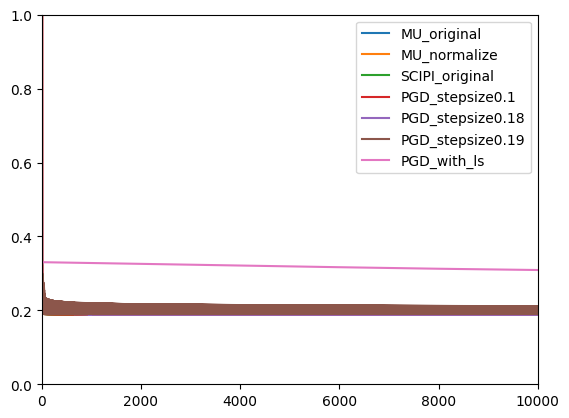

In [23]:
import matplotlib.pyplot as plt
plt.plot(res_mu[1])
plt.plot(res_mu_with_normalize[1])
plt.plot(res_scipi[1])
plt.plot(res_pgd0[1])
plt.plot(res_pgd1[1])
plt.plot(res_pgd2[1])
plt.plot(res_pgd_with_linesearch[1])
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize0.1", "PGD_stepsize0.18", "PGD_stepsize0.19", "PGD_with_ls"])
plt.ylim([0, 1.0])
plt.xlim([0000,10000])

#### Zoomed in

(0.0, 10000.0)

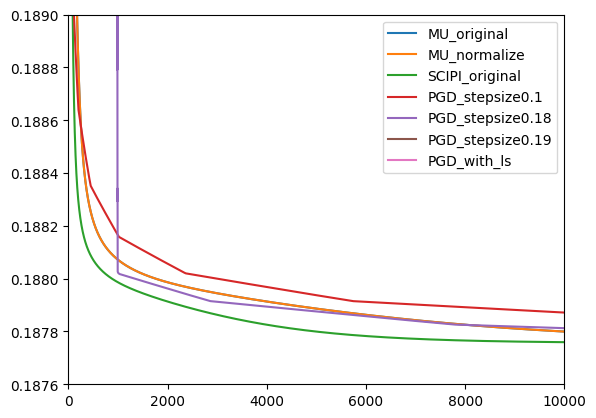

In [24]:
import matplotlib.pyplot as plt
plt.plot(res_mu[1])
plt.plot(res_mu_with_normalize[1])
plt.plot(res_scipi[1])
plt.plot(res_pgd0[1])
plt.plot(res_pgd1[1])
plt.plot(res_pgd2[1])
plt.plot(res_pgd_with_linesearch[1])
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize0.1", "PGD_stepsize0.18", "PGD_stepsize0.19", "PGD_with_ls"])
plt.ylim([0.1876, 0.1890])
plt.xlim([0000,10000])

#### Relative Error

In [25]:
np.random.seed(1 * 2023)
    
pi = np.random.rand(m)
pi = pi / pi.sum()
init_obj = -(np.log(L @ pi + 1e-8) * w).sum()

def get_rel(res, res_max):
    return (res - res_max) / (init_obj - res_max)

(0.0, 10000.0)

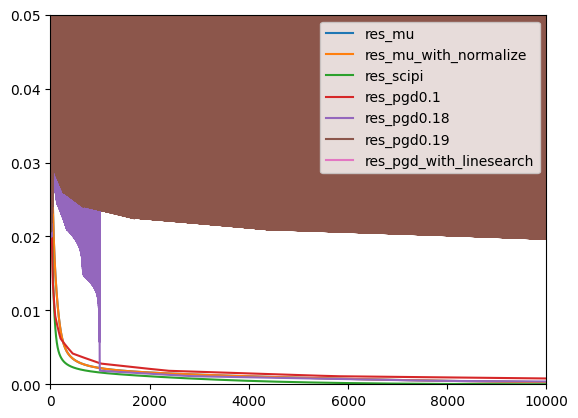

In [26]:
import matplotlib.pyplot as plt
rel_mu = get_rel(res_mu[1], res_scipi[1][-1])
rel_mu_with_normalize = get_rel(res_mu_with_normalize[1], res_scipi[1][-1])
rel_scipi = get_rel(res_scipi[1], res_scipi[1][-1])
rel_pgd0 = get_rel(res_pgd0[1], res_scipi[1][-1])
rel_pgd1 = get_rel(res_pgd1[1], res_scipi[1][-1])
rel_pgd2 = get_rel(res_pgd2[1], res_scipi[1][-1])
rel_pgd_with_linesearch = get_rel(res_pgd_with_linesearch[1], res_scipi[1][-1])
plt.plot(rel_mu)
plt.plot(rel_mu_with_normalize)
plt.plot(rel_scipi)
plt.plot(rel_pgd0)
plt.plot(rel_pgd1)
plt.plot(rel_pgd2)
plt.plot(rel_pgd_with_linesearch)
plt.legend(["res_mu", "res_mu_with_normalize", "res_scipi", "res_pgd0.1", "res_pgd0.18", "res_pgd0.19", "res_pgd_with_linesearch"])
plt.ylim([0.000, 0.05])
plt.xlim([0000,10000])

(0.0, 10000.0)

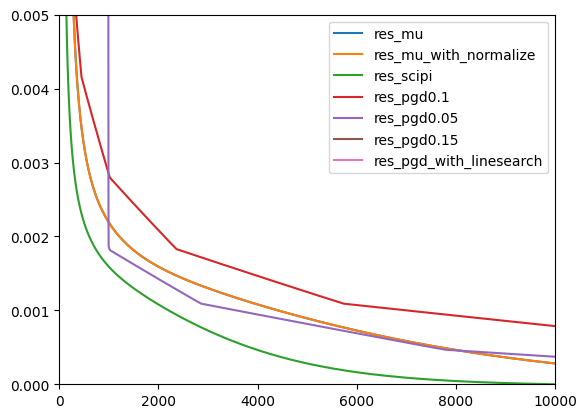

In [27]:
import matplotlib.pyplot as plt
rel_mu = get_rel(res_mu[1], res_scipi[1][-1])
rel_mu_with_normalize = get_rel(res_mu_with_normalize[1], res_scipi[1][-1])
rel_scipi = get_rel(res_scipi[1], res_scipi[1][-1])
rel_pgd0 = get_rel(res_pgd0[1], res_scipi[1][-1])
rel_pgd1 = get_rel(res_pgd1[1], res_scipi[1][-1])
rel_pgd2 = get_rel(res_pgd2[1], res_scipi[1][-1])
rel_pgd_with_linesearch = get_rel(res_pgd_with_linesearch[1], res_scipi[1][-1])
plt.plot(rel_mu)
plt.plot(rel_mu_with_normalize)
plt.plot(rel_scipi)
plt.plot(rel_pgd0)
plt.plot(rel_pgd1)
plt.plot(rel_pgd2)
plt.plot(rel_pgd_with_linesearch)
plt.legend(["res_mu", "res_mu_with_normalize", "res_scipi", "res_pgd0.1", "res_pgd0.05", "res_pgd0.15", "res_pgd_with_linesearch"])
plt.ylim([0.000, 0.005])
plt.xlim([0000,10000])